# Abalone Case Study

## Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description.
The number of rings is the value to predict. 

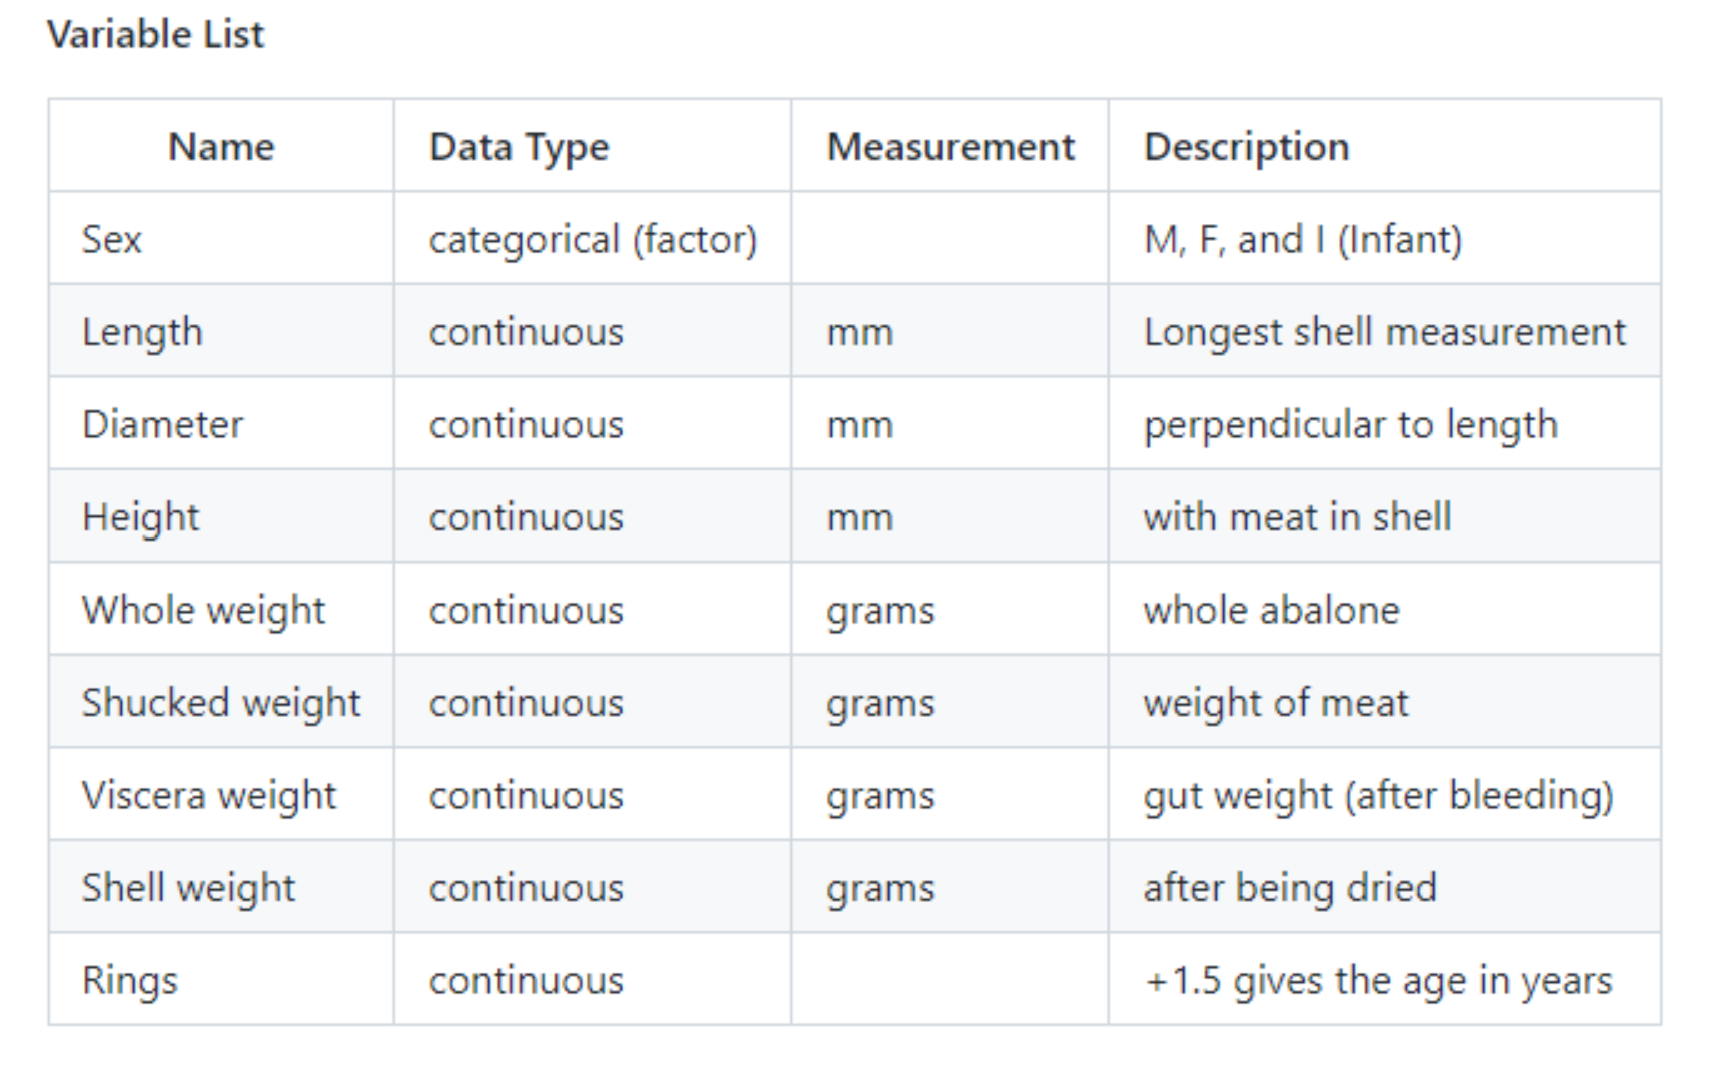

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

---------------------------------------------------------------------------------------------------------------------------

# Objective :

To predict the number of  rings in each abalone which will lead us to the age of that abalone.

The age of abalone is ( number of rings +1.5) years.

---------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df =pd.read_csv('abalone.csv')

In [3]:
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

--------------------------------------------------------------------------------------------------------------------------

# Statistical Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [6]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

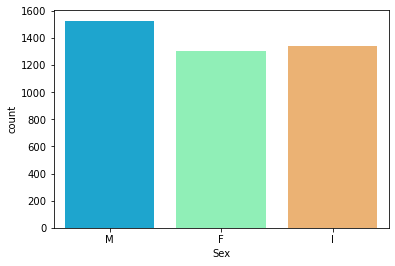

In [7]:
sns.countplot(df['Sex'], palette='rainbow')

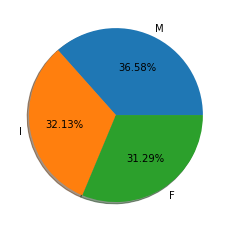

In [8]:
labels = 'M','I','F'
fig, ax = plt.subplots()
ax.pie(df['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

#### Comment :

1. Minimum of ring is 1 and maximum number of rings is 29.
2. There is lot of difference between 3rd quartile and maximum value in height, whole weight and shucked weight.So there is possibilty of outliers in these columns.
3. By taking consideration of mean and std deviation columns in staticscal summary we can see that spread of distribution is large in case of whole weight and Rings columns.
4. Average number of rings in abalone is 9. So in further investiagtion we need to range of number in case of adult abalone and infant abalone.
5. Sex is categorical data having object datatypes need to convert into numerical datatypes using encoding techniques.
6. From Max row we can say that there is possibilty that abalone having higher height, whole weight, shucked weight and higher number of rings. So inturn investigating relation between age and aspects like weight, height.
7. In dataset we have 4177 entries with 9 features.
8. Sex has three unique categories Male, Female and infant.
9. None of the features have minimum = 0 except Height. (need to look in)

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Sex                          0             0.0
Length                       0             0.0
Diameter                     0             0.0
Height                       0             0.0
Whole weight                 0             0.0
Shucked weight               0             0.0
Viscera weight               0             0.0
Shell weight                 0             0.0
Rings                        0             0.0


In [10]:
means = pd.pivot_table(data=df, index='Sex',aggfunc={'Length':np.mean, 'Diameter':np.mean, 'Height':np.mean, 
                                                     'Whole weight':np.mean,'Shucked weight':np.mean,
                                                     'Viscera weight':np.mean,'Shell weight':np.mean,'Rings':np.mean})

In [11]:
means

Diameter    Height    Length      Rings  Shell weight  Shucked weight  \
Sex                                                                          
F    0.454732  0.158011  0.579093  11.129304      0.302010        0.446188   
I    0.326494  0.107996  0.427746   7.890462      0.128182        0.191035   
M    0.439287  0.151381  0.561391  10.705497      0.281969        0.432946   

     Viscera weight  Whole weight  
Sex                                
F          0.230689      1.046532  
I          0.092010      0.431363  
M          0.215545      0.991459

In [12]:
means = pd.pivot_table(data=df, index='Rings' ,aggfunc={'Length':np.mean, 'Diameter':np.mean, 'Height':np.mean, 
                                                     'Whole weight':np.mean,'Shucked weight':np.mean,
                                                     'Viscera weight':np.mean,'Shell weight':np.mean,})
means

Diameter    Height    Length  Shell weight  Shucked weight  \
Rings                                                               
1      0.055000  0.010000  0.075000      0.001500        0.001000   
2      0.100000  0.025000  0.150000      0.005000        0.004500   
3      0.128667  0.041667  0.176000      0.008933        0.011767   
4      0.161579  0.053947  0.221491      0.018000        0.024719   
5      0.210696  0.069913  0.285739      0.036770        0.061696   
6      0.278861  0.091776  0.369363      0.078388        0.123158   
7      0.321535  0.105921  0.422033      0.111648        0.182657   
8      0.384798  0.128556  0.498776      0.178609        0.293773   
9      0.425218  0.142721  0.546865      0.236509        0.387938   
10     0.449290  0.154093  0.574629      0.282976        0.447217   
11     0.470595  0.161253  0.599374      0.319866        0.503977   
12     0.462434  0.161292  0.589457      0.321157        0.472781   
13     0.456453  0.160887  0.578892      0.320828        0.434638   
14     0.458294  0.163571  0.580198      0.329960        0.427190   
15     0.456262  0.161359  0.575728      0.321650        0.402471   
16     0.468433  0.171866  0.587537      0.377858        0.421716   
17     0.475345  0.173966  0.601034      0.393414        0.467052   
18     0.471310  0.171548  0.596071      0.386762        0.446833   
19     0.470781  0.170313  0.595625      0.365312        0.440625   
20     0.482308  0.173846  0.603654      0.425885        0.458115   
21     0.485357  0.171071  0.618214      0.444643        0.447464   
22     0.472500  0.189167  0.595000      0.390000        0.405000   
23     0.463889  0.172778  0.587222      0.370556        0.399444   
24     0.540000  0.200000  0.695000      0.632500        0.600250   
25     0.490000  0.215000  0.645000      0.510000        0.426500   
26     0.495000  0.195000  0.600000      0.375000        0.384000   
27     0.500000  0.202500  0.607500      0.705000        0.539000   
29     0.585000  0.185000  0.700000      0.475000        0.705500   

       Viscera weight  Whole weight  
Rings                                
1            0.000500      0.002000  
2            0.004000      0.015000  
3            0.006267      0.028400  
4            0.012956      0.059605  
5            0.027330      0.125500  
6            0.058371      0.273174  
7            0.085899      0.397386  
8            0.138502      0.640753  
9            0.187803      0.852013  
10           0.223128      1.008748  
11           0.252393      1.142559  
12           0.239575      1.102904  
13           0.235421      1.075453  
14           0.235258      1.079992  
15           0.227539      1.040951  
16           0.239769      1.133388  
17           0.251233      1.234328  
18           0.242762      1.194333  
19           0.248859      1.166797  
20           0.251135      1.251750  
21           0.246607      1.250607  
22           0.217167      1.221250  
23           0.254833      1.170389  
24           0.332750      1.798750  
25           0.228500      1.406000  
26           0.190000      1.057500  
27           0.298000      1.698000  
29           0.321500      1.807500

We can see that in for feature female abalone has higher average value compare to male abalone.

----------------------------------------------------------------------------------------------------------------------------

# EDA

<AxesSubplot:xlabel='Rings', ylabel='count'>

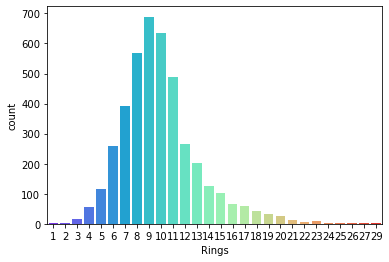

In [13]:
sns.countplot(df['Rings'], palette='rainbow')

In [14]:
print(df['Rings'].value_counts())

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64


##### Comment - 
1. Maximum number of  rings observe in abalone 9,10, 8 rings in decremental order.
2. No abalone has 28 rings.
3. The number of rings measured in the data ranges from 1 to 29 and most of the abalone have between 5 and 15 rings. 

### Distribution of features

In [15]:
features=df[df.columns[1:]]

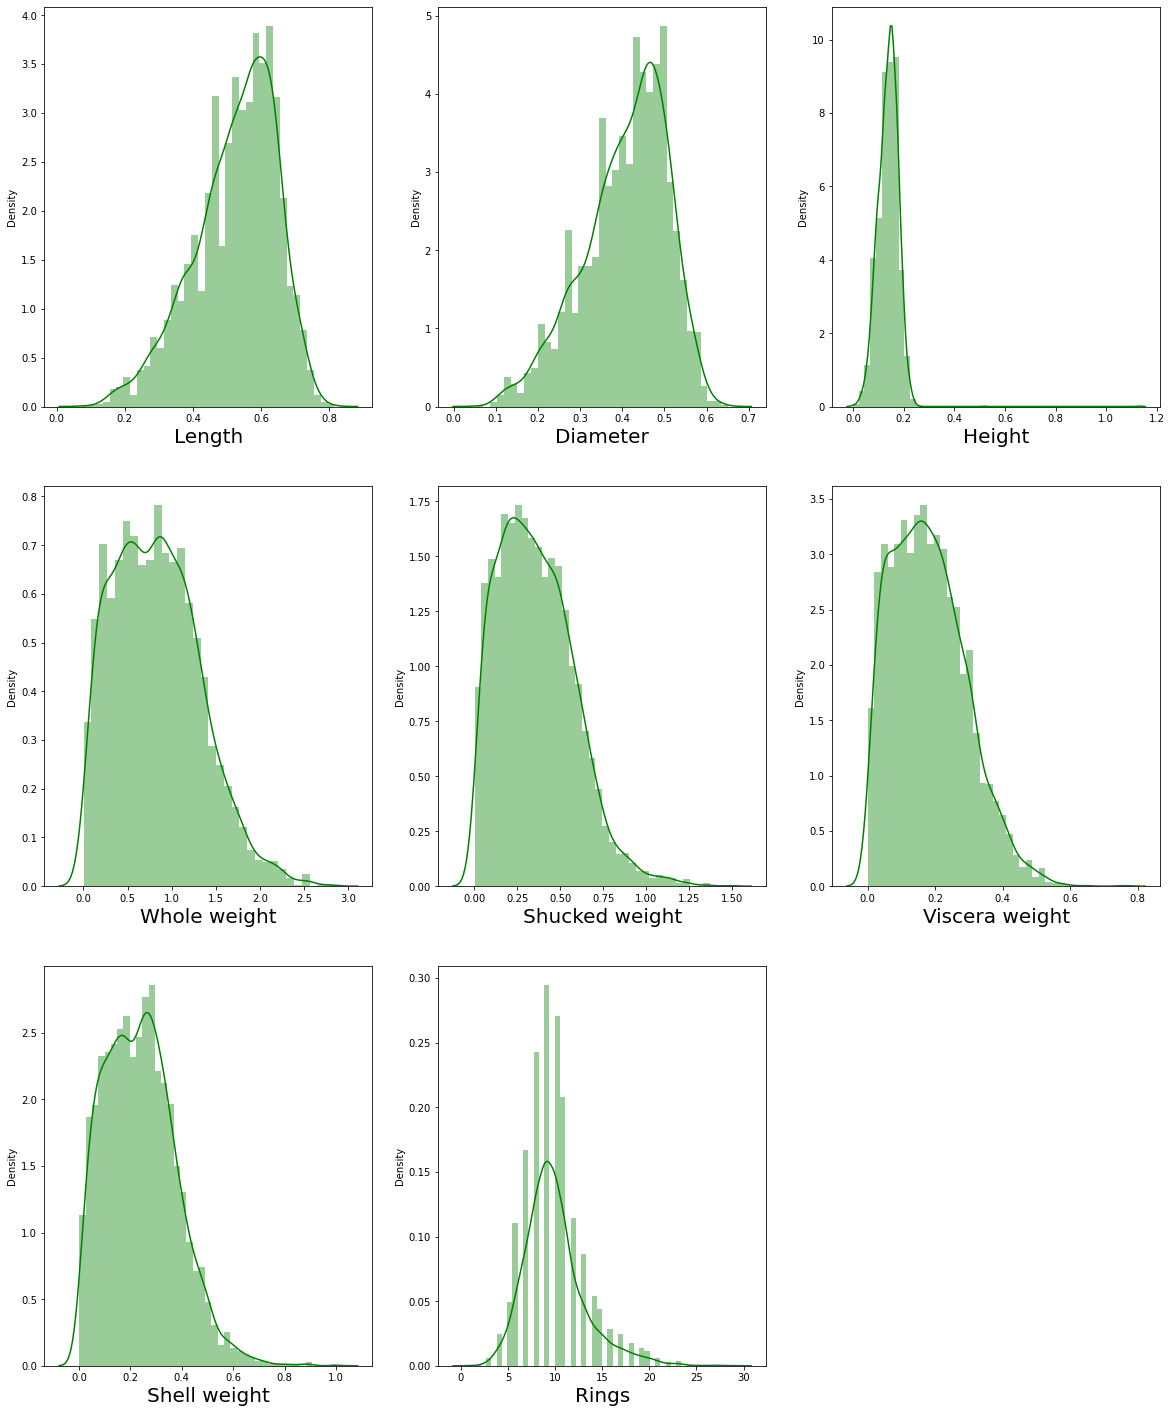

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in features:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(features[column], color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Interpreting Relationship between Dependent Variable and Independent Variables

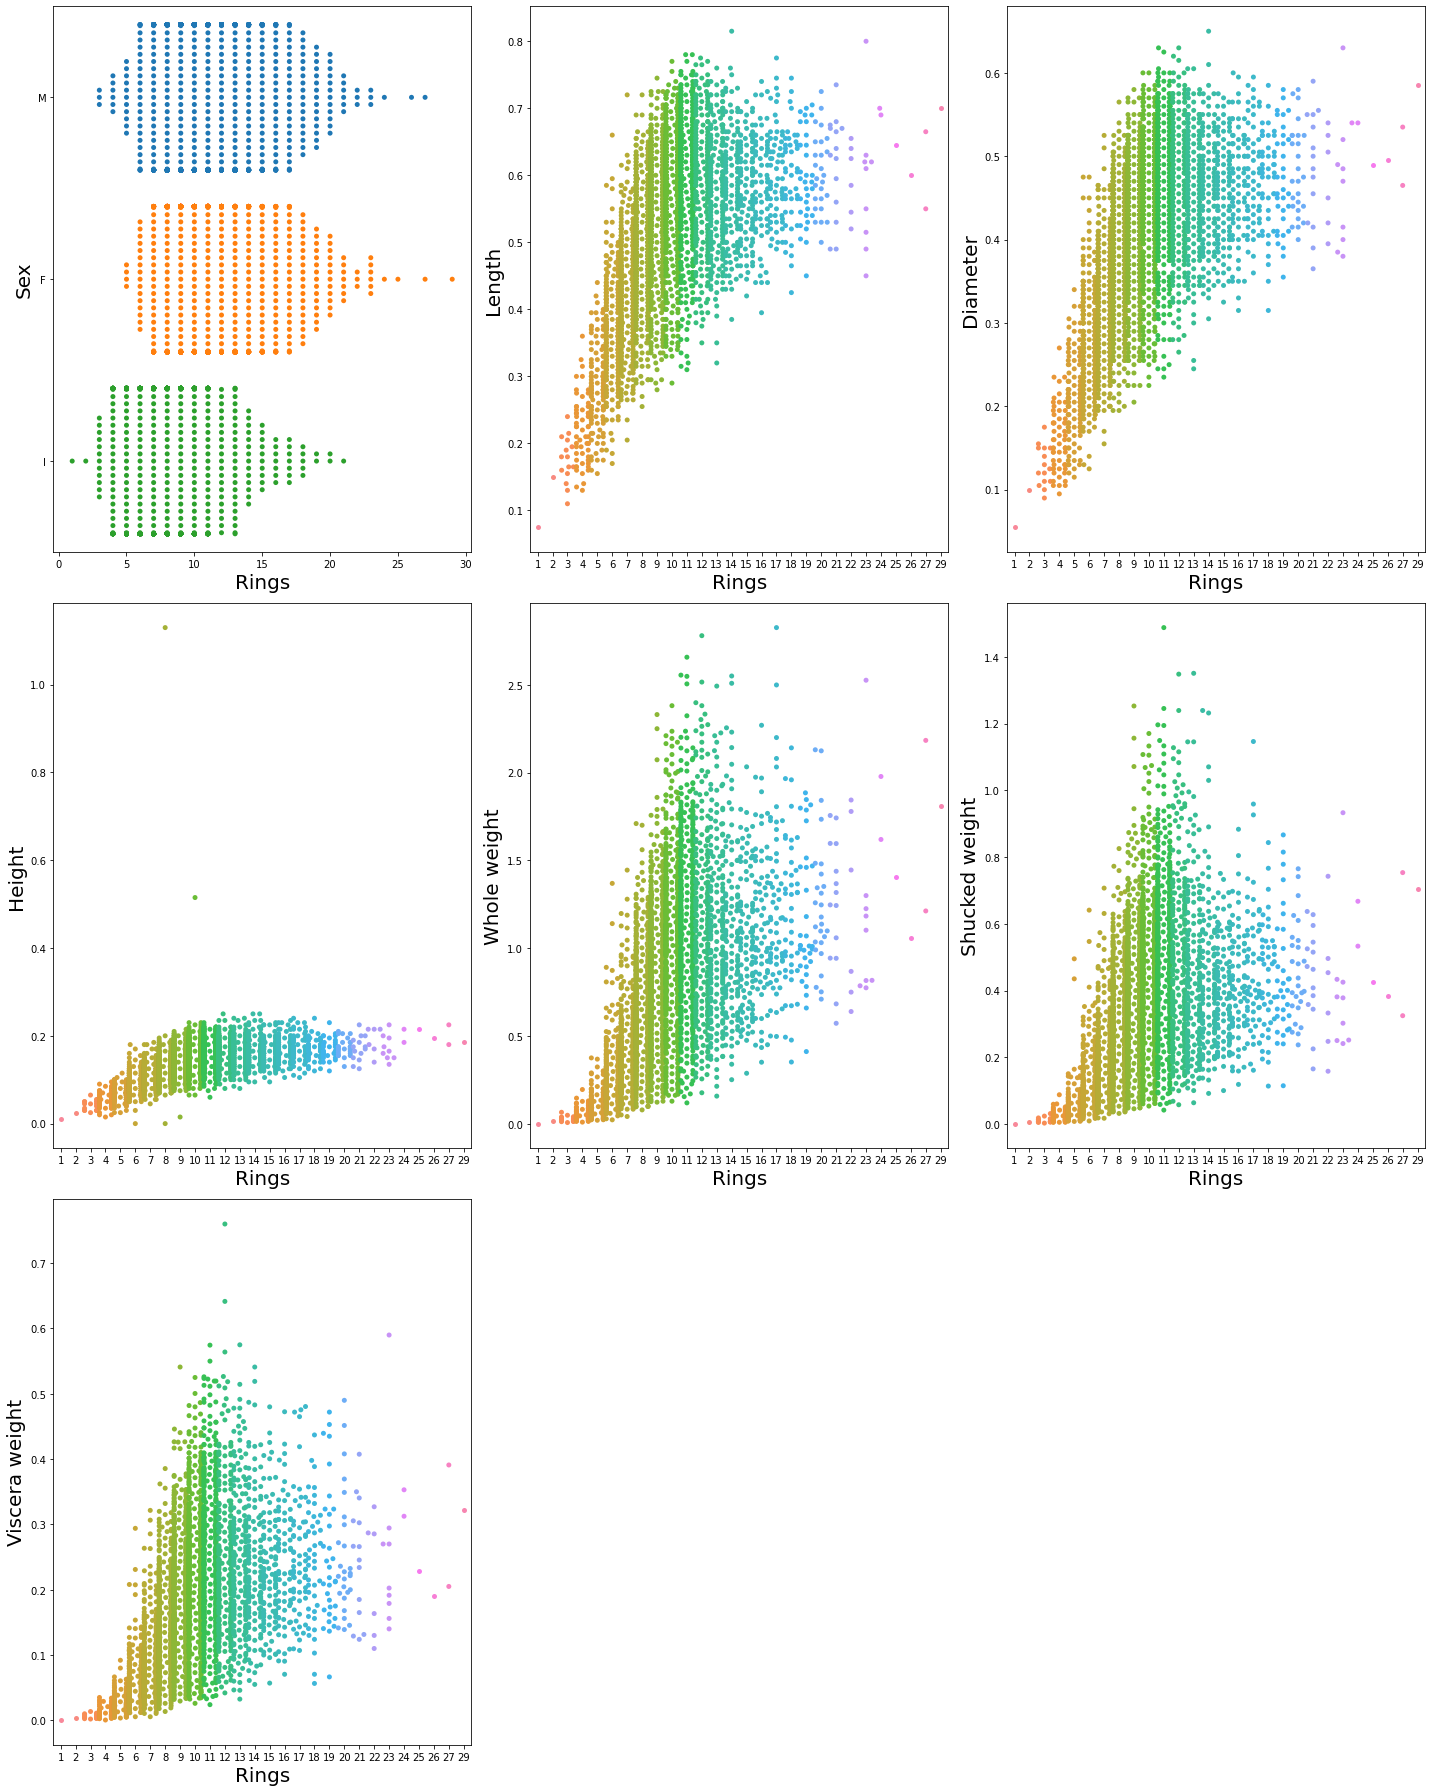

In [17]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
x = df['Rings']
for col in df:
    if plotnum<=7:
        plt.subplot(3,3,plotnum)
        sns.swarmplot(x,df[col])
        plt.xlabel('Rings',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

From the above graphs it is observed that infants have rings ranging from 0 to 21 while Male and female have rings ranging from 5 t0 29. This may imply a negative correlation between infants and number of rings. Length, Diameter and the different weight attributes show an almost linear relationship with the number of rings. The presence of outliers can also be seen in all the features.

## Multivariate Analysis

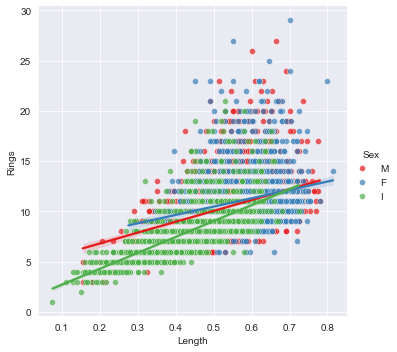

In [18]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Length', y = 'Rings', data = df, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

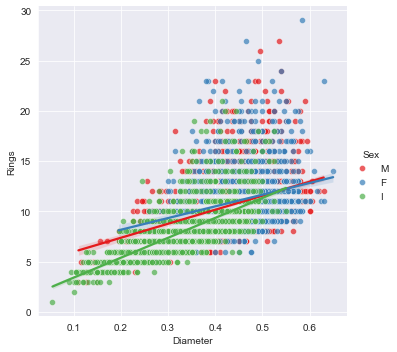

In [19]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Diameter', y = 'Rings', data = df, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

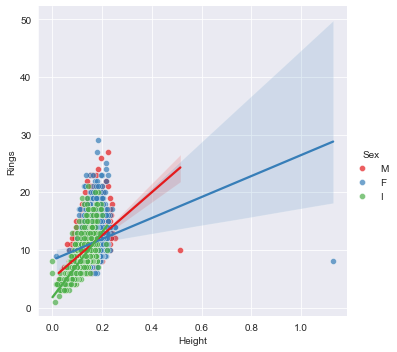

In [20]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Height', y = 'Rings', data = df, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

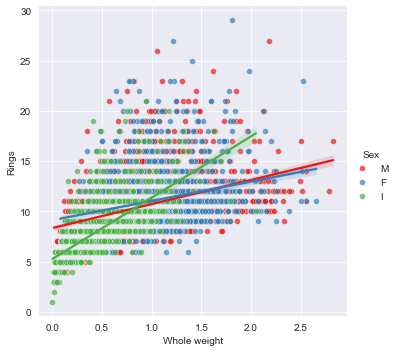

In [21]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Whole weight', y = 'Rings', data = df, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

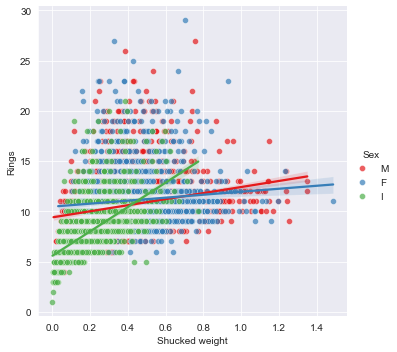

In [22]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Shucked weight', y = 'Rings', data = df, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

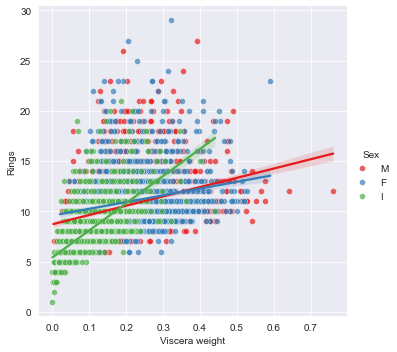

In [23]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Viscera weight', y = 'Rings', data = df, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

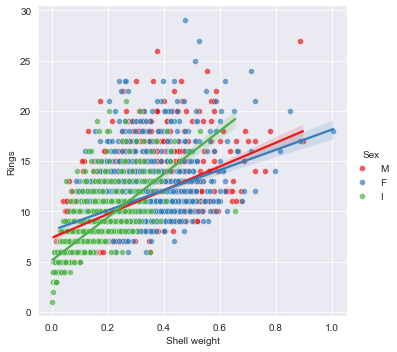

In [24]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Shell weight', y = 'Rings', data = df, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

### Multivariate Anaysis using Joint grid

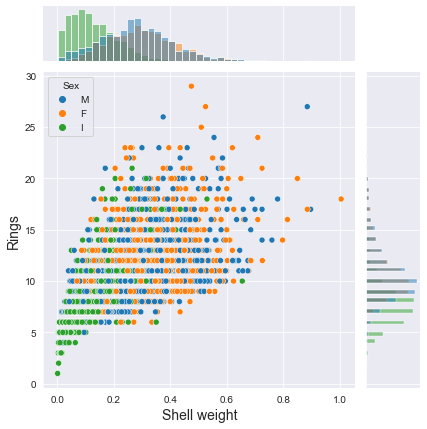

In [25]:
g = sns.JointGrid(data=df, x='Shell weight', y='Rings', hue='Sex')
g.plot(sns.scatterplot, sns.histplot)
g.set_axis_labels(xlabel='Shell weight', ylabel='Rings', fontsize=14)

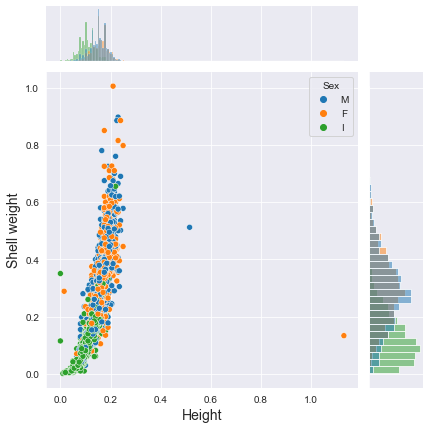

In [26]:
g = sns.JointGrid(data=df, x='Height', y='Shell weight', hue='Sex')
g.plot(sns.scatterplot, sns.histplot)
g.set_axis_labels(xlabel='Height', ylabel='Shell weight', fontsize=14)

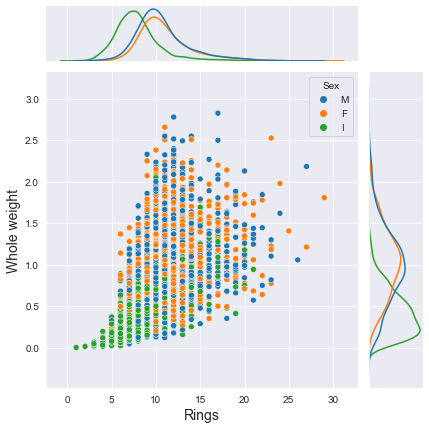

In [27]:
g = sns.JointGrid(data=df, x='Rings', y='Whole weight', hue='Sex')
g.plot(sns.scatterplot, sns.kdeplot)
g.set_axis_labels(xlabel='Rings', ylabel='Whole weight', fontsize=14)

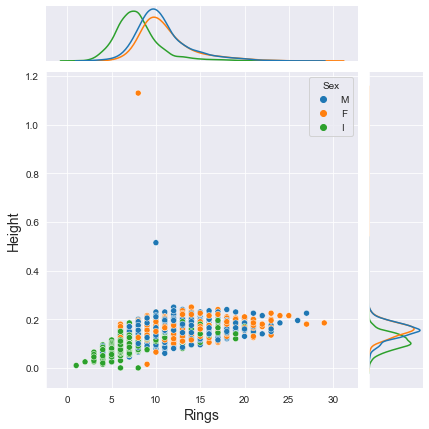

In [28]:
g = sns.JointGrid(data=df, x='Rings', y='Height', hue='Sex')
g.plot(sns.scatterplot, sns.kdeplot)
g.set_axis_labels(xlabel='Rings', ylabel='Height', fontsize=14)

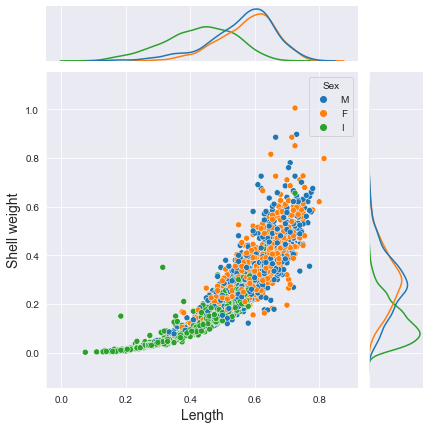

In [29]:
g = sns.JointGrid(data=df, x='Length', y='Shell weight', hue='Sex')
g.plot(sns.scatterplot, sns.kdeplot)
g.set_axis_labels(xlabel='Length', ylabel='Shell weight', fontsize=14)

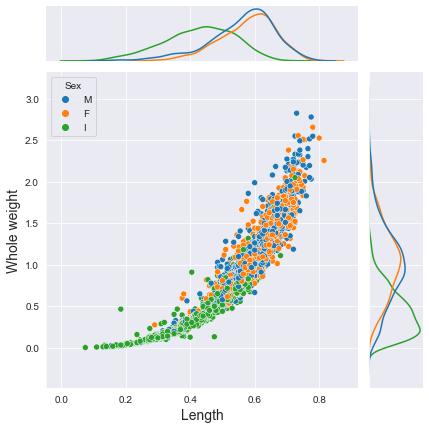

In [30]:
g = sns.JointGrid(data=df, x='Length', y='Whole weight', hue='Sex')
g.plot(sns.scatterplot, sns.kdeplot)
g.set_axis_labels(xlabel='Length', ylabel='Whole weight', fontsize=14)

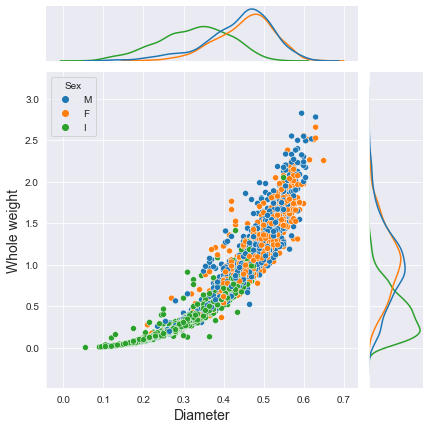

In [31]:
g = sns.JointGrid(data=df, x='Diameter', y='Whole weight', hue='Sex')
g.plot(sns.scatterplot, sns.kdeplot)
g.set_axis_labels(xlabel='Diameter', ylabel='Whole weight', fontsize=14)

## Correlation

In [32]:
df.corr()

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weight        0.931961      0.882617  0.420884  
Viscera weight        1.000000      0.907656  0.503819  
Shell weight          0.907656      1.000000  0.627574  
Rings                 0.503819      0.627574  1.000000

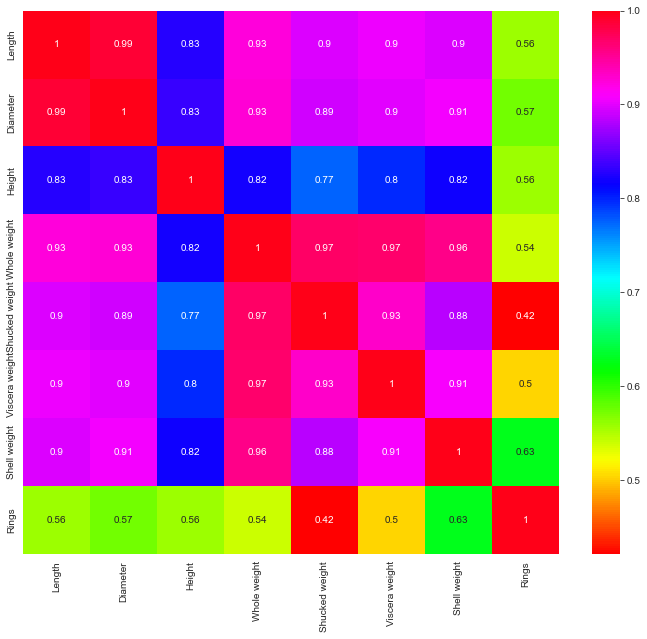

In [33]:
plt.figure(figsize =(12,10))
sns.heatmap(df.corr(), annot= True ,cmap='hsv')
# cmap =PiYG cmap='Spectral'
plt.tight_layout
plt.show()

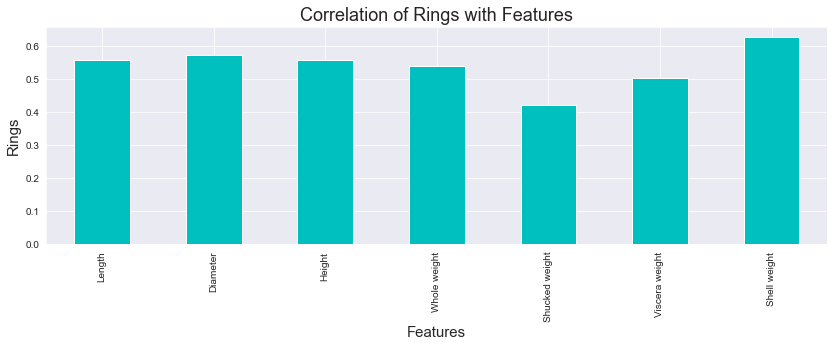

In [34]:
plt.figure(figsize = (14,4))
df.corr()['Rings'].drop(['Rings']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Rings',fontsize=15)
plt.title('Correlation of Rings with Features',fontsize = 18)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


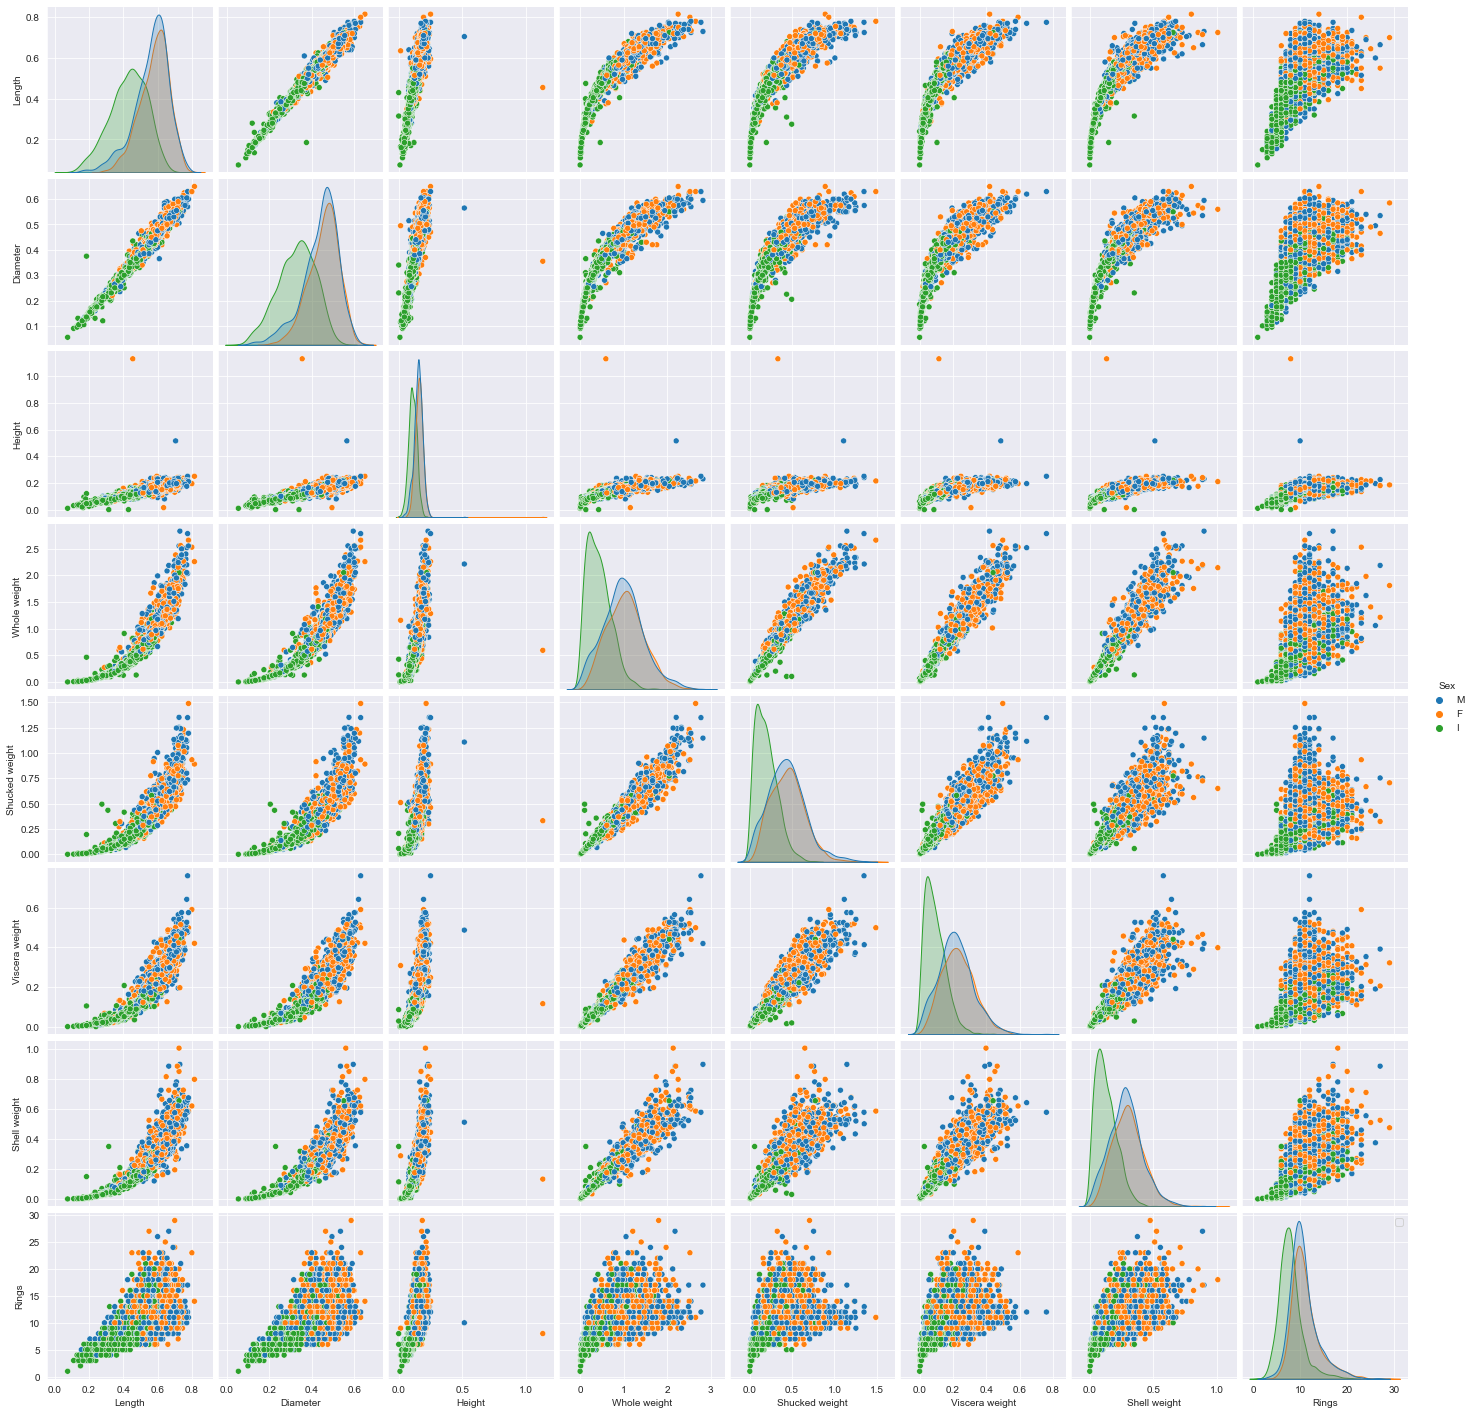

In [35]:
sns.pairplot(data=df, hue='Sex')
plt.legend()
plt.show()

#### Comment -
    
    1. Many features are highly correlated
        - length and diameter show linear correlation
        - the length and weight features are quadratic correlated
        - whole weight is linearly correlated with other weight features
    2. Number of Rings is positively corelated with almost all quadratic features
    3. Possible outliers in Height features
    
Scatter plot analysis also shows that data mostly cover the values for Rings from 3 to little over 20, selecting only this data in the model may be taken under consideration to increase the accuracy.

---------------------------------------------------------------------------------------------------------------------------

# Outliers Detection and Removal

#### From df.describe in height column we can see 0 value in height column. It can be valid data point or possibly Outliers.  We will investigate these observations

In [36]:
(df.Height ==0).sum()

2

In [37]:
df[df['Height'] ==0 ]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Rings  
1257          0.0860        0.1150      8  
3996          0.0285        0.3505      6

#### Comment - 
1. We can see that both are infants having 8 and 6 rings respectively. 
2. There are two obeservations for which Height might not be recoreded properly as other features seem to have valid values. 
3. We can also see that whole weight values are very low and fall within 1st quartile. 

This might not be error so we will keep these entries for futher investigation.

<AxesSubplot:ylabel='Rings'>

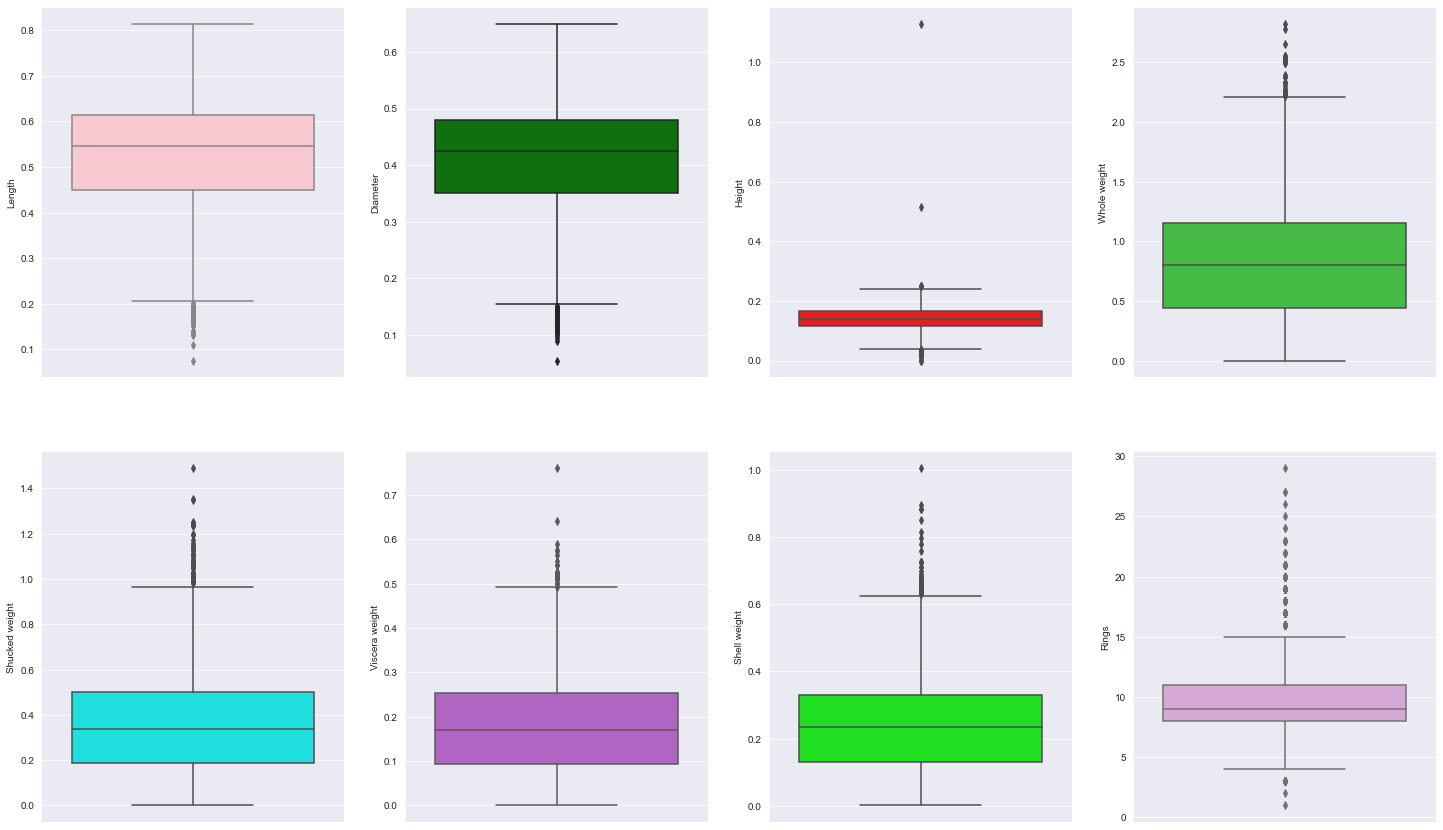

In [38]:
fig, ((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8)) =plt.subplots(nrows =2,ncols=4, figsize =(25,15))
sns.boxplot(ax =ax1, y='Length', data=df, color ='Pink')
sns.boxplot(ax=ax2, y='Diameter', data=df, color= 'green')
sns.boxplot(ax=ax3, y='Height', data=df, color= 'red')
sns.boxplot(ax=ax4, y='Whole weight', data=df, color= 'limegreen')
sns.boxplot(ax=ax5, y='Shucked weight', data=df, color= 'cyan')
sns.boxplot(ax=ax6, y='Viscera weight', data=df, color= 'mediumorchid')
sns.boxplot(ax=ax7, y='Shell weight', data=df, color= 'lime')
sns.boxplot(ax=ax8, y='Rings', data=df, color= 'plum')

## Outliers Detection basesd on IQR 

In [39]:
df2 =df.copy()
Q1 =df2.quantile(0.25)
Q3= df2.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64


In [40]:
df_new =df2[~((df <(Q1 - 1.5*IQR)) | (df >(Q3 + 1.5*IQR))).any(axis=1)]
print(df_new.shape)

(3781, 9)


##### Data Loss

In [41]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((4177-3781)/4177)*100,'%')

Percentage Data Loss : 9.480488388795786 %


#### Comment -
1. There is significant data loss using IQR method.
2. From pairplot and Boxplot we know that outliers are present in dataset but as datapoints are not much scatter.
3. Most of outliers exist in 4th quartile of dataset as we can see in boxplot.
##### Different outlier detection criteria require in this case.

## Quantile-based Flooring and Capping technique

### Further outliers investigation will be done bases Quantile-based Flooring and Capping technique. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values.

In [42]:
df3=df.copy()
Q1 = df3.quantile(0.10)
Q3= df3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Length            0.2600
Diameter          0.2150
Height            0.0750
Whole weight      0.9480
Shucked weight    0.4155
Viscera weight    0.2097
Shell weight      0.2640
Rings             5.0000
dtype: float64


In [43]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(4054, 9)


##### Data Loss

In [44]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((4177-4052)/4177)*100,'%')

Percentage Data Loss : 2.9925784055542257 %


--------------------------------------------------------------------------------------------------------------------------

## Label Encoding

In [45]:
data['Sex']=data['Sex'].astype('category')

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['Sex']=labelencoder.fit_transform(data['Sex'])

In [47]:
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

---------------------------------------------------------------------------------------------------------------------------

## Multicollinearity and Skewness Handling

### Skewness of features using distplot

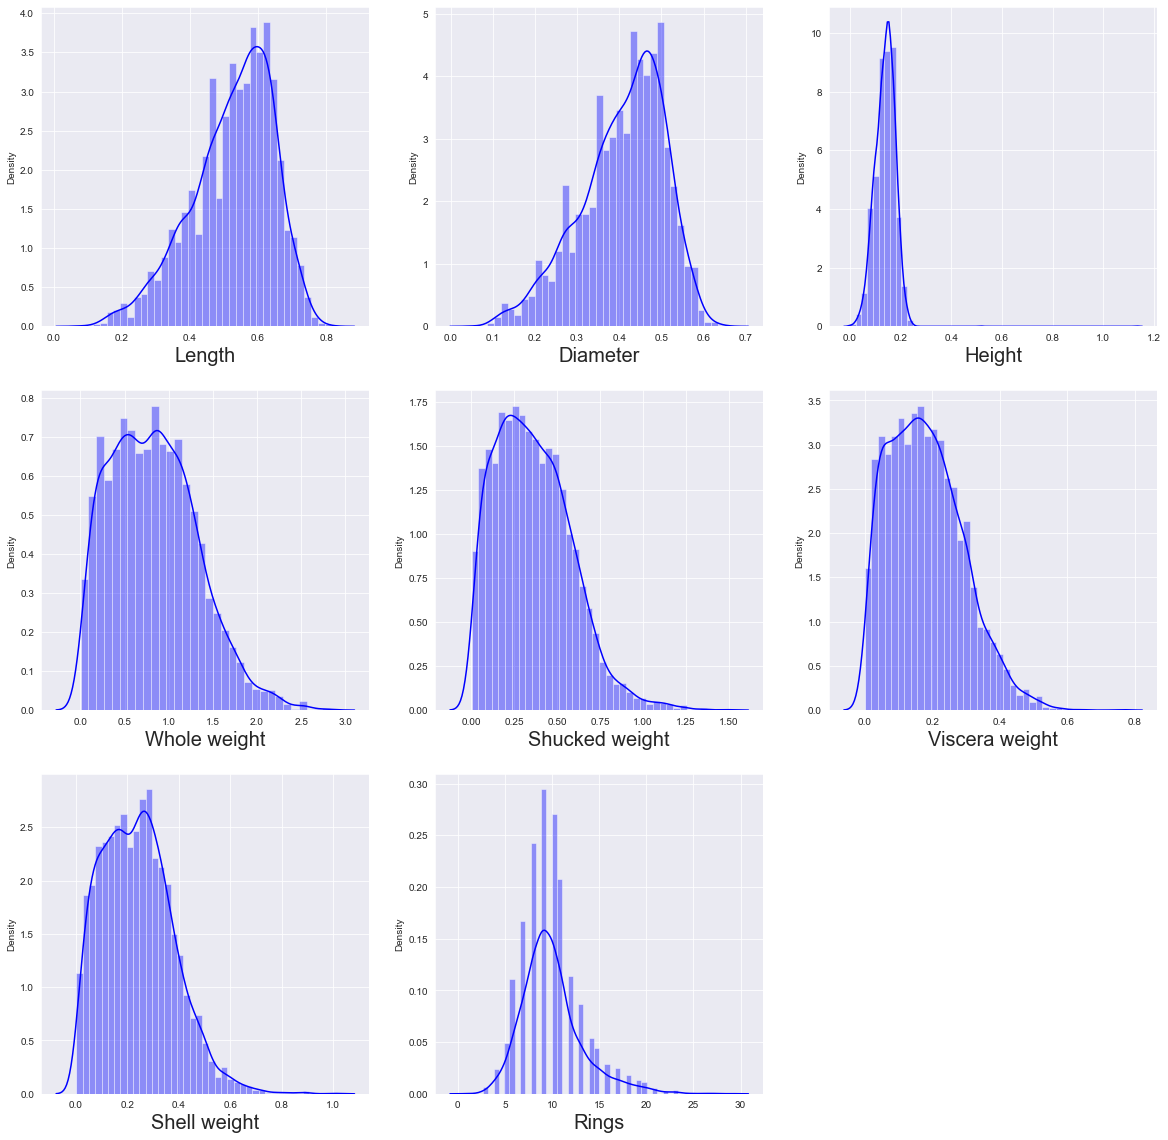

In [48]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in features:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(features[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [49]:
data.skew()

Sex              -0.099614
Length           -0.650481
Diameter         -0.625683
Height           -0.287115
Whole weight      0.431248
Shucked weight    0.553748
Viscera weight    0.517454
Shell weight      0.451069
Rings             0.556570
dtype: float64

#### Comment -
1. Optimal range for skewness is -0.5 to 0.5.
2. Shucked weight, Viscera weight, Rings are positive/right skewed data.
3. Length, Diameter are Negtive/left skewed data.

#### Transforming positive or right skew data using boxcox transformation

In [50]:
from scipy.stats import boxcox

In [51]:
data['Rings']=boxcox(data['Rings'],0.5)

In [52]:
data['Viscera weight']=boxcox(data['Viscera weight'],0.5)

In [53]:
data['Shucked weight']=boxcox(data['Shucked weight'],0.5)

#### Transforming negative or left skew data using yeo-johnson transformation

In [54]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [55]:
ld=['Length','Diameter']
ds =data[ld].copy()

In [56]:
column_trans =ColumnTransformer(
    [('Length',PowerTransformer(method='yeo-johnson',standardize=True),['Length']),
    ('Diameter',PowerTransformer(method='yeo-johnson',standardize=True),['Diameter'])])
transformed_yeojohnson =column_trans.fit_transform(data)   
new_cols=['Length','Diameter']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

Length  Diameter
0 -0.667607 -0.532231
1 -1.381357 -1.372934
2 -0.045473  0.034830
3 -0.780287 -0.532231
4 -1.498584 -1.444884

In [57]:
# reseting index and mergeing transform data
data.reset_index(drop=True, inplace=True)
dataset.index=data.index
data[ld]=dataset[ld]
data

Sex    Length  Diameter  Height  Whole weight  Shucked weight  \
0       2 -0.667607 -0.532231   0.095        0.5140       -1.052371   
1       2 -1.381357 -1.372934   0.090        0.2255       -1.369128   
2       0 -0.045473  0.034830   0.135        0.6770       -0.987083   
3       2 -0.780287 -0.532231   0.125        0.5160       -1.071560   
4       1 -1.498584 -1.444884   0.080        0.2050       -1.401669   
...   ...       ...       ...     ...           ...             ...   
4049    0  0.280493  0.379260   0.165        0.8870       -0.783447   
4050    2  0.528135  0.261568   0.135        0.9660       -0.674858   
4051    2  0.630763  0.686522   0.205        1.1760       -0.550172   
4052    0  0.896512  0.814780   0.150        1.0945       -0.542605   
4053    2  1.903665  1.803640   0.195        1.9485       -0.055264   

      Viscera weight  Shell weight     Rings  
0          -1.364390        0.1500  5.745967  
1          -1.559546        0.0700  3.291503  
2          -1.247670        0.2100  4.000000  
3          -1.324722        0.1550  4.324555  
4          -1.602508        0.0550  3.291503  
...              ...           ...       ...  
4049       -1.022247        0.2490  4.633250  
4050       -1.073717        0.2605  4.324555  
4051       -0.927619        0.3080  4.000000  
4052       -0.978237        0.2960  4.324555  
4053       -0.772808        0.4950  4.928203  

[4054 rows x 9 columns]

#### Skewness after transforming features

In [58]:
data.skew()

Sex              -0.099614
Length           -0.075653
Diameter         -0.077456
Height           -0.287115
Whole weight      0.431248
Shucked weight   -0.202253
Viscera weight   -0.209296
Shell weight      0.451069
Rings             0.070783
dtype: float64

#### Heamap of correlation after removing skewness

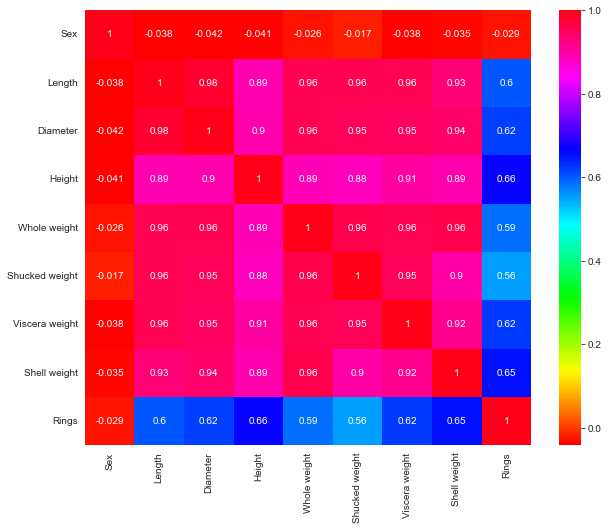

In [59]:
plt.figure(figsize =(10,8))
sns.heatmap(data.corr(), annot= True ,cmap='hsv')
plt.tight_layout
plt.show()

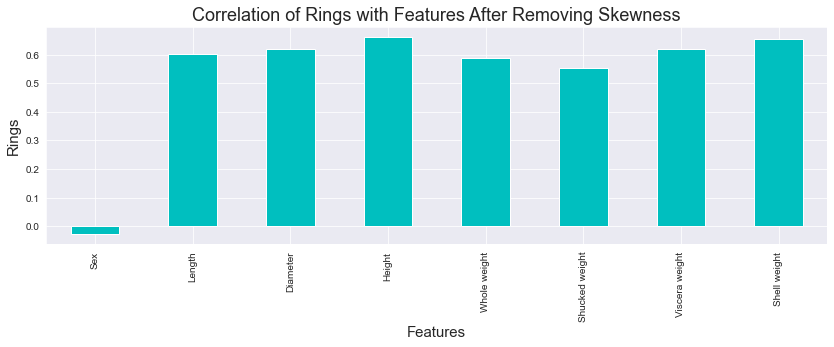

In [60]:
plt.figure(figsize = (14,4))
data.corr()['Rings'].drop(['Rings']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Rings',fontsize=15)
plt.title('Correlation of Rings with Features After Removing Skewness',fontsize = 18)
plt.show()

### Checking Multicollinearity between features using variance_inflation_factor

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data2=data.copy()
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(data2.values,i) for i in range(data2.shape[1])]
vif['Features']= data2.columns
vif

VIF        Features
0    2.687109             Sex
1   35.358230          Length
2   34.825856        Diameter
3   75.551122          Height
4   88.716661    Whole weight
5  118.352248  Shucked weight
6  148.435061  Viscera weight
7   71.424165    Shell weight
8   44.040458           Rings

#### Comment -
1. We looked that variable inflation factor for all variable and it appears that all predictors have multicollinearity issue
2. Length, diameter and height are geometrical physical dimension of abalone.These all parameter are highly correleated.
3. Variable Whole_weight should be the linear function of variables Shucked_weight, Viscersa_weight and Shell_weight, and we could write it as Whole_weight = Shucked_weight + Viscera_weight+ Shell_weight + unknown mass of water/blood lost from shucking process. So we can find high colliearity between these features.
4. for further investigation we will drop height and viscera Weight.

#### Checking Multicollinearity after removal of features

In [62]:
X=data2.drop(columns=['Height','Viscera weight'])

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features']= X.columns
vif

VIF        Features
0   2.654081             Sex
1  35.175715          Length
2  34.597647        Diameter
3  59.622457    Whole weight
4  37.989437  Shucked weight
5  66.716105    Shell weight
6  36.619193           Rings

##### Still there is multicollinearity. So we will deal with by apply standard scalar and Pca

--------------------------------------------------------------------------------------------------------------------------

## Standard Scaling

In [64]:
X=data.drop(columns =['Rings'])
Y=data['Rings']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [66]:
X_scale

array([[ 1.15804719, -0.66760682, -0.53223062, ..., -0.45251308,
        -0.59040928, -0.62025066],
       [ 1.15804719, -1.38135679, -1.37293446, ..., -1.27249757,
        -1.30744444, -1.22466053],
       [-1.29030917, -0.04547251,  0.03483041, ..., -0.28350261,
        -0.16156088, -0.16694325],
       ...,
       [ 1.15804719,  0.63076341,  0.68652211, ...,  0.84752569,
         1.01436054,  0.57345884],
       [-1.29030917,  0.89651222,  0.81477984, ...,  0.86711526,
         0.82838375,  0.48279736],
       [ 1.15804719,  1.90366528,  1.80363999, ...,  2.12869278,
         1.58316405,  1.98626692]])

---------------------------------------------------------------------------------------------------------------------------

## PCA 

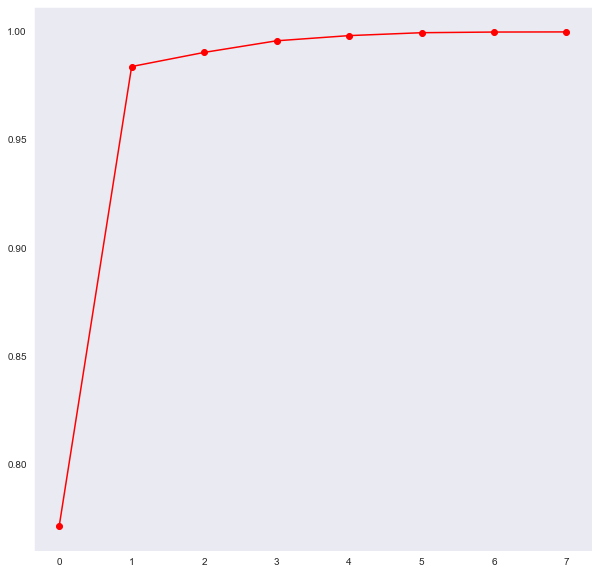

In [67]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

#### Comment -
###### AS per the graph, we can see that 4 principal components attribute for 90% of variation in the data.  We shall pick the first 4 components for our prediction

In [68]:
pca_new = PCA(n_components=4)
x_new = pca_new.fit_transform(X)
print(x_new)

[[-0.95732746 -0.92022443 -0.04562805  0.07909536]
 [-2.15273109 -0.88814733  0.03380769  0.02989795]
 [-0.05270386  1.05773825 -0.15426444 -0.02319095]
 ...
 [ 1.05836453 -0.97602779  0.06931566  0.07878917]
 [ 1.3319794   1.01844116 -0.0253804  -0.09620832]
 [ 2.97574043 -1.03060451  0.23824682  0.0688845 ]]


---------------------------------------------------------------------------------------------------------------------------

# Machine Learning Model Building

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (2716, 8)
Training target vector size: (2716,)
Test feature matrix size: (1338, 8)
Test target vector size: (1338,)


####  Finding Best Random state

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.549688262238442 on Random_state 137


## Linear Regression : Base model

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=98, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Number Rings:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Number of Rings:'+'\033[0m\n',Y_test)

Predicted Number Rings:
 [4.39606979 5.73833791 4.63118913 ... 3.34284505 4.62672406 4.49046695]


Actual Number of Rings:
 533     4.633250
2034    5.745967
2579    4.324555
3337    3.656854
1872    4.633250
          ...   
4048    3.656854
1228    5.211103
2723    2.898979
3570    4.324555
2370    6.246211
Name: Rings, Length: 1217, dtype: float64


### Linear Regression Evaluation Matrix

In [73]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 0.48210095615273474
Mean squared error : 0.3954205059348338
Root Mean Squared Error: 0.6288247020711207


 R2 Score :
0.5214442533771824


 True Values Vs Predicted Value plot :


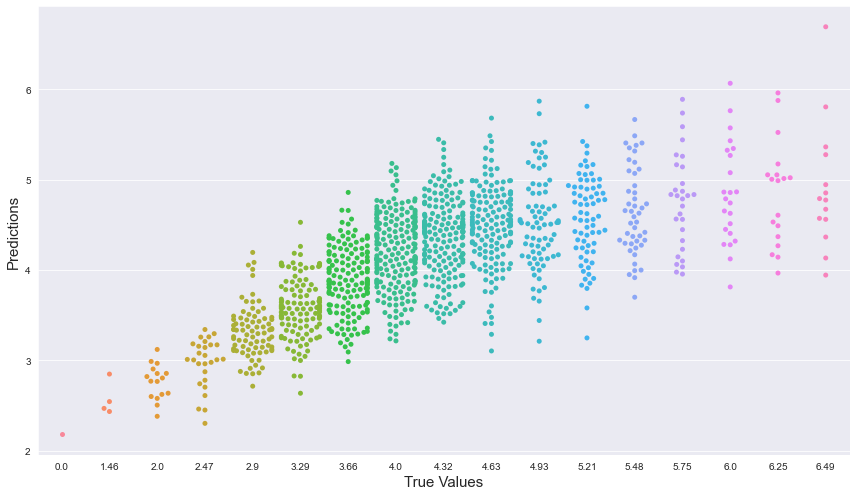

In [74]:
plt.figure(figsize=(12,7))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Finding n_neighbors for KNN Regressor

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.8347883136236218
RMSE value for k=  2 is: 0.7217072114396456
RMSE value for k=  3 is: 0.6917398132766853
RMSE value for k=  4 is: 0.6707615177230124
RMSE value for k=  5 is: 0.656019216762547
RMSE value for k=  6 is: 0.6501848999692386
RMSE value for k=  7 is: 0.6477527881852062
RMSE value for k=  8 is: 0.6457781117764342
RMSE value for k=  9 is: 0.6425138493671446
RMSE value for k=  10 is: 0.6413427013478056
RMSE value for k=  11 is: 0.6400308302034055
RMSE value for k=  12 is: 0.6414554722534389
RMSE value for k=  13 is: 0.6387922852163875
RMSE value for k=  14 is: 0.6377418201679262
RMSE value for k=  15 is: 0.63931172777743
RMSE value for k=  16 is: 0.6382252048447464
RMSE value for k=  17 is: 0.6400794481586217
RMSE value for k=  18 is: 0.6393326145663536
RMSE value for k=  19 is: 0.6402259049654679
RMSE value for k=  20 is: 0.6419050429661187
RMSE value for k=  21 is: 0.6432800985035324
RMSE value for k=  22 is: 0.6422563139971649
RMSE value for k=  23 

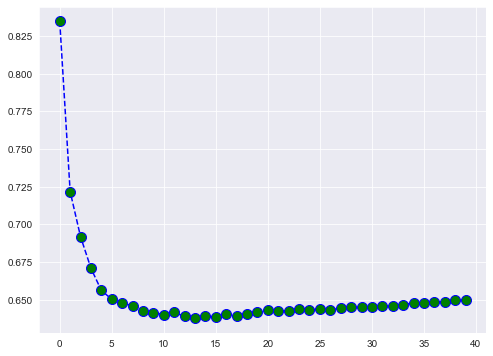

In [76]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(40), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Comment- 
At k= 15, we get the minimum RMSE value which approximately 0.6040115624368425, and shoots up on further increasing the k value. We can safely say that k=20 will give us the best result in this case

---------------------------------------------------------------------------------------------------------------------------

## Applying other Regression Model

In [77]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor(n_neighbors=15)
model = [rf,svr,dtc,adb,gradb,knn]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.4437542596964166
Mean squared error : 0.33136012483936716
Root Mean Squared Error: 0.5756388840578502


 R2 Score :
0.5989730184360575




 Error of  SVR() :
Mean absolute error : 0.44579763634578834
Mean squared error : 0.3465506566324091
Root Mean Squared Error: 0.588685532888663


 R2 Score :
0.5805887511188363




 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.595057604892011
Mean squared error : 0.6443777523112251
Root Mean Squared Error: 0.8027314322432036


 R2 Score :
0.22014495521572275




 Error of  AdaBoostRegressor() :
Mean absolute error : 0.5184934498975109
Mean squared error : 0.4043357668491155
Root Mean Squared Error: 0.6358740180642038


 R2 Score :
0.510654602159968




 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.4372188468619616
Mean squared error : 0.3253009152454869
Root Mean Squared Error: 0.570351571616566


 R2 Score :
0.6063061474155176




 Error of  KNeighborsR



 True Values Vs Predicted Value plot RandomForestRegressor() :


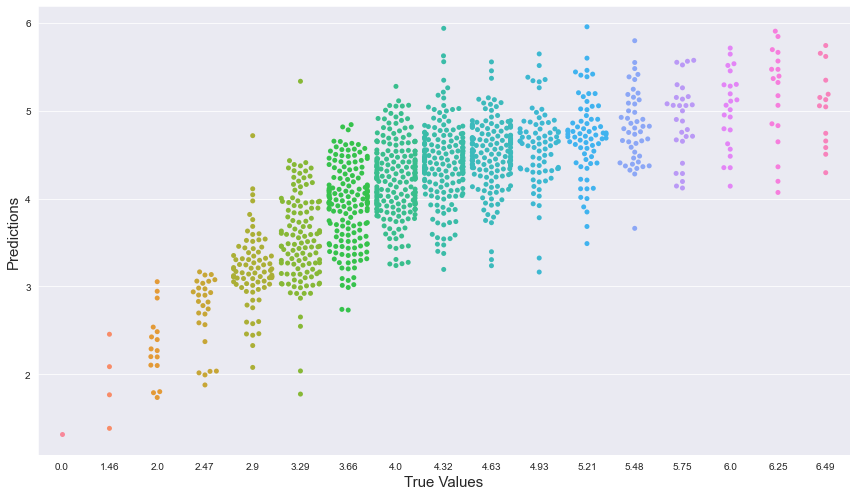





 True Values Vs Predicted Value plot SVR() :


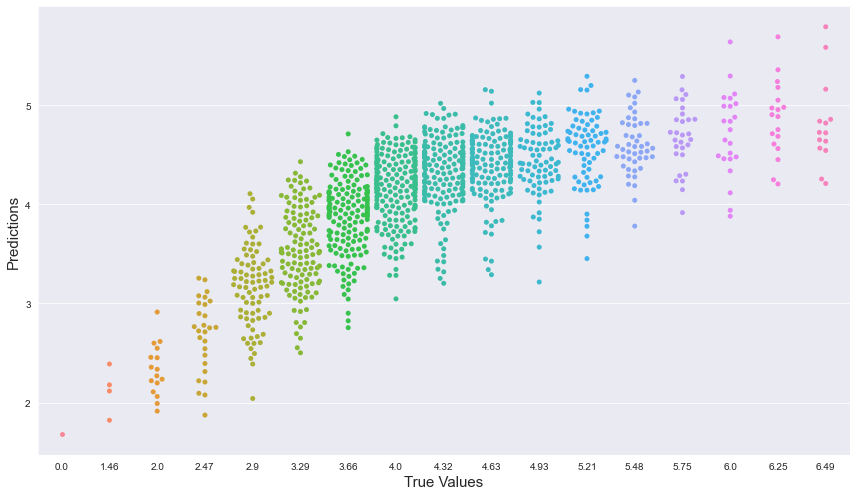





 True Values Vs Predicted Value plot DecisionTreeRegressor() :


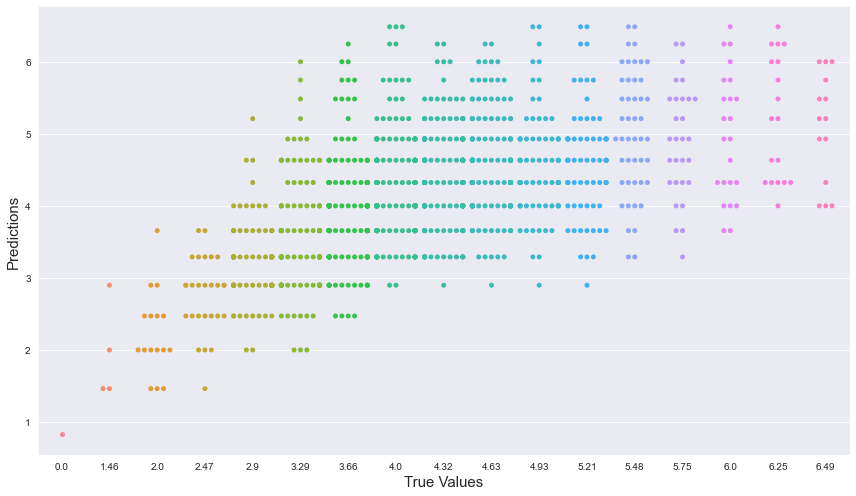





 True Values Vs Predicted Value plot AdaBoostRegressor() :


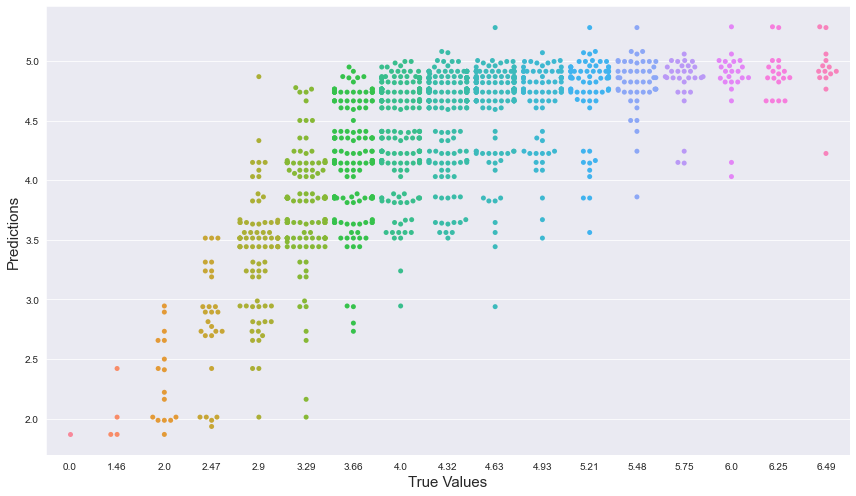





 True Values Vs Predicted Value plot GradientBoostingRegressor() :


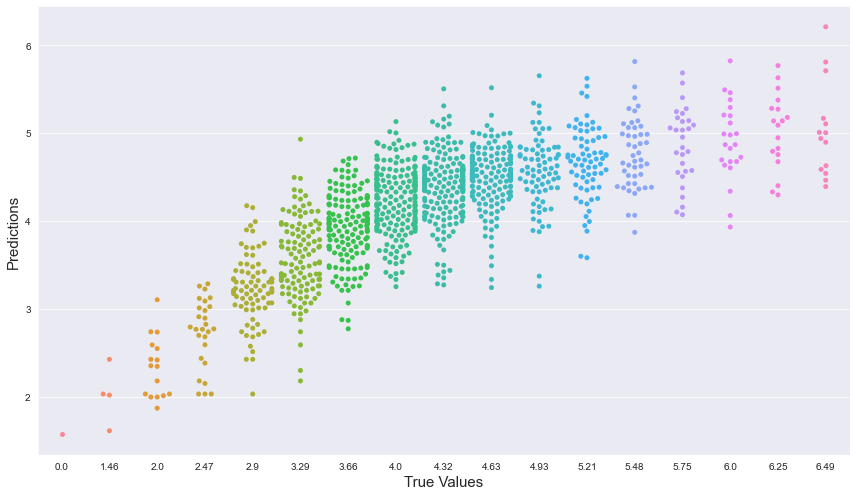





 True Values Vs Predicted Value plot KNeighborsRegressor(n_neighbors=15) :


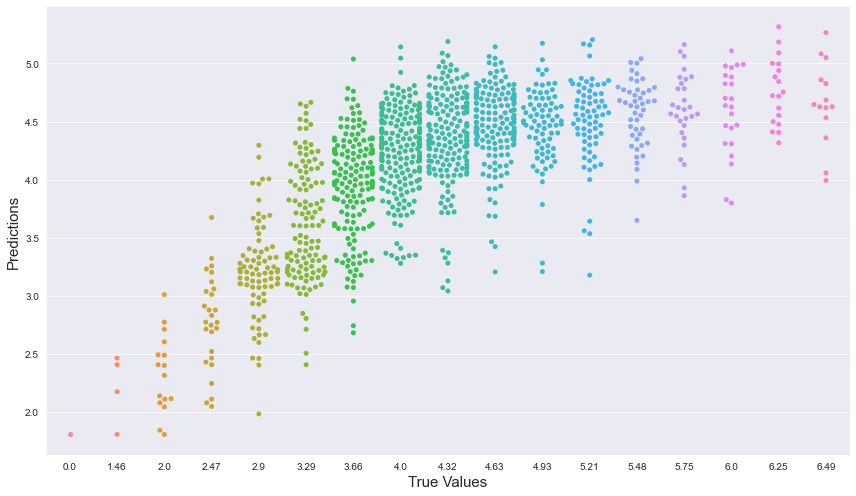

In [78]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor(n_neighbors=15)
model = [rf,svr,dtc,adb,gradb,knn]

for m in model:
    plt.figure(figsize=(12,7))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.swarmplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

---------------------------------------------------------------------------------------------------------------------------

# Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score
model = [lin_reg,rf,svr,dtc,adb,gradb,knn]
for m in model:
    score = cross_val_score(m, X, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('\n')
    print('==============================================================================================================')



Cross Validation Score : LinearRegression() :

Score : [0.49529699 0.29403499 0.5439473  0.48576554]
Mean Score : 0.45476120522440855
Std deviation : 0.09538277695302469


 R2 Score :
0.5053492282296717




Cross Validation Score : RandomForestRegressor() :

Score : [0.59512166 0.3937178  0.60570654 0.54759693]
Mean Score : 0.5355357341755623
Std deviation : 0.08475290861129949


 R2 Score :
0.5053492282296717




Cross Validation Score : SVR() :

Score : [0.53879111 0.54872959 0.59833405 0.56417592]
Mean Score : 0.5625076670315049
Std deviation : 0.02257555958099078


 R2 Score :
0.5053492282296717




Cross Validation Score : DecisionTreeRegressor() :

Score : [ 0.23526989 -0.31133233  0.2816727   0.16539449]
Mean Score : 0.09275118644218833
Std deviation : 0.23694063628179152


 R2 Score :
0.5053492282296717




Cross Validation Score : AdaBoostRegressor() :

Score : [ 0.559359   -0.03926956  0.45512927  0.47911012]
Mean Score : 0.36358220653598783
Std deviation : 0.23576771564358

#### we can see that Gradient Boosting Regressor() gives maximum Accuracy. So we will apply Hyperparameter tuning on Gradient Boosting Regressor

# Hyper Parameter Tuning : GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.7,0.5, 0.3, 0.1],
                  'n_estimators' : [100,250,500,750],
                  'max_depth'    : [4,6,8,10,12]}] 

In [82]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameters,cv=2,n_jobs = -1)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.02, 0.03],
                          'max_depth': [4, 6, 8, 10, 12],
                          'n_estimators': [100, 250, 500, 750],
                          'subsample': [0.9, 0.7, 0.5, 0.3, 0.1]}])

In [83]:
GCV.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.1}

# Final Model

In [84]:
Final_mod = GradientBoostingRegressor(learning_rate=0.01 ,n_estimators= 250, max_depth=6 ,subsample=0.3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.43924631765444944
Mean squared error : 0.3276223443150648
Root Mean Squared Error: 0.5723830398562354


 R2 Score of Final Model :
0.60349664915999




 True Values Vs Predicted Value plot :


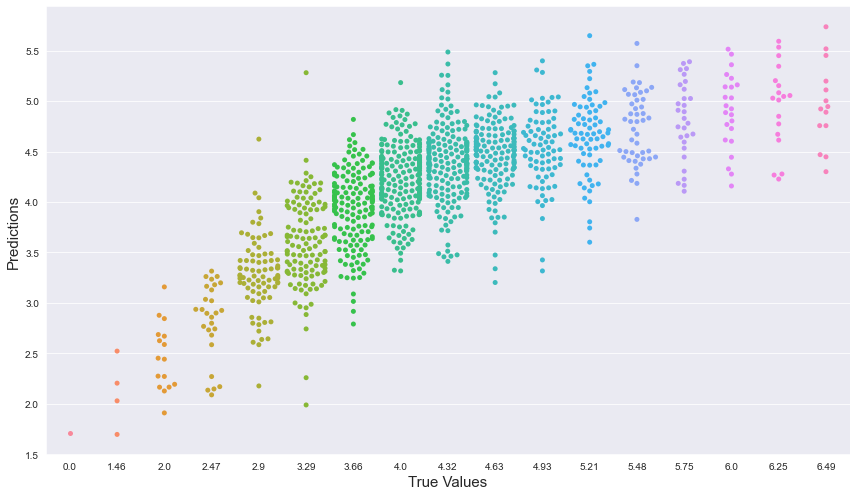

In [85]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

<AxesSubplot:>

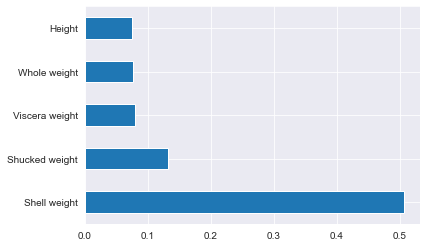

In [86]:
feat_importances = pd.Series(Final_mod.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

#### 'Shell weight' is most imporatnt feature for this model.

## Saving model

In [87]:
import joblib
joblib.dump(Final_mod,'Abalone Ring Age Prediction_Final.pkl')

['Abalone Ring Age Prediction_Final.pkl']